<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALL LIBRARIES**


In [ ]:
#install library
!pip install google-search-results
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25788 sha256=fc01ff99410dc3d098e06d85fc017066680ecf0628f428c2f097d53ca8f0d720
  Stored in directory: /root/.cache/pip/wheels/ea/58/9e/3d89ebff948ef9ce0a6e056a8279c1f93c76993387766f8387
Successfully built google-search-results
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library needed for the search
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns
import re 

plt.style.use('fivethirtyeight')

Mounted at /content/drive


# **SCRIPT**

In [ ]:
#SerpApi google search
search_term="Junior Data Analyst" #Job to be searching
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [ ]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

https://serpapi.com/search


<ipython-input-33-d668609e91a2>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  jobs_df = pd.concat([pd.DataFrame(jobs_df),


In [ ]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,work_from_home
0,Junior Data Analyst,Cube hub,"Bentonville, AR",via ZipRecruiter,Job Description\n\nFunding fully approved: (wh...,"[{'title': 'Qualifications', 'items': ['Indust...",[{'link': 'https://www.google.com/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[5 days ago, Full-time, No degree mentioned]",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0Ii...,5 days ago,Full-time,NaN


In [ ]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    2
related_links     0
thumbnail         3
extensions        0
job_id            0
posted_at         2
schedule_type     0
work_from_home    9
dtype: int64

In [ ]:
jobs_df.shape #Shape of the DataFrame

(10, 13)

In [ ]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  8 non-null      object
 6   related_links   10 non-null     object
 7   thumbnail       7 non-null      object
 8   extensions      10 non-null     object
 9   job_id          10 non-null     object
 10  posted_at       8 non-null      object
 11  schedule_type   10 non-null     object
 12  work_from_home  1 non-null      object
dtypes: object(13)
memory usage: 1.1+ KB


**# HARD SKILLS **


In [ ]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [ ]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [ ]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [ ]:
Ujobs

,items
0,"[Industry Specific Experience, required/ideal/..."
1,"[Strong proficiency with SQL, Excel, and other..."
2,[Knowledge and experience with querying relati...
3,"[Master’s degree in Computer Science, Computer..."
4,"[3+ years of related experience, Secondary mor..."
5,"[Minimum 1 year of experience, Bachelors (requ..."
8,"[BA/BS Degree or equivalent, 0-2 years of rele..."
9,"[Master’s degree in Computer Science, Computer..."


In [ ]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

In [ ]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:  
  if " R " in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "Power BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

**# AVERAGE TIME**

In [ ]:
#Extracting time and place to work

time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   



In [ ]:
jobs_df.to_csv('/content/drive/MyDrive/Colab Notebooks/2023/Jobs.csv')

# **SUMMARY**

In [ ]:
#Sunburst chart of the companies that offer the job

name = jobs_df.groupby(['company_name'])['company_name'].count()
px.sunburst(name, path=[name.index], values=name.values)

In [ ]:
toolss = pd.DataFrame(tools)

(0.0, 8.0)

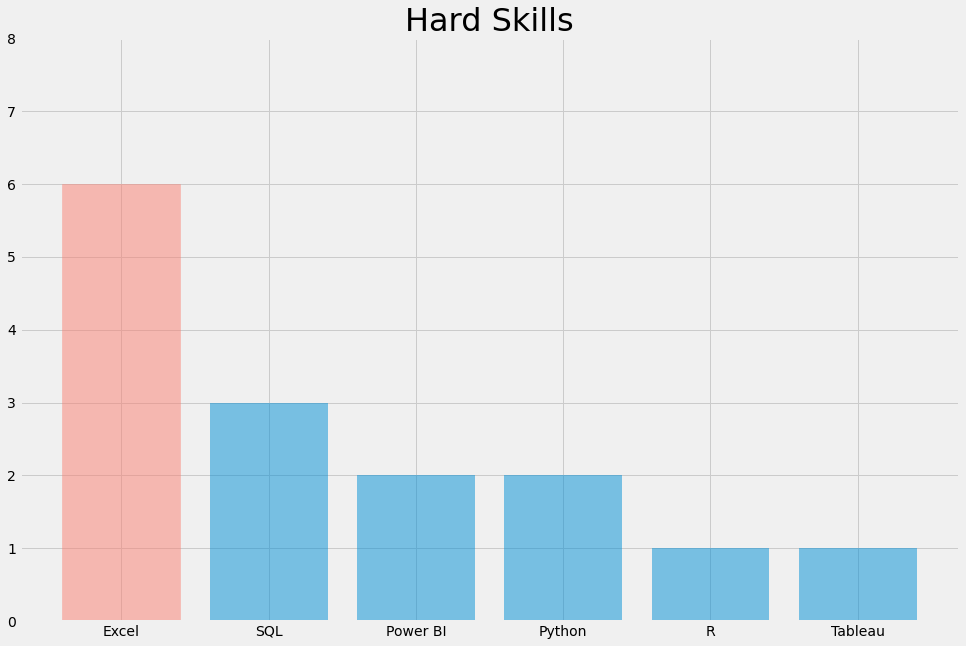

In [ ]:
# Bar chart of the hard skills needed to execute the job
t = toolss.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
fig = plt.bar(x=t.index, height=t.values, alpha=0.5)
fig[0].set_color('salmon')
plt.title("Hard Skills", fontsize=32)
plt.ylim(0,8)


(0.0, 11.0)

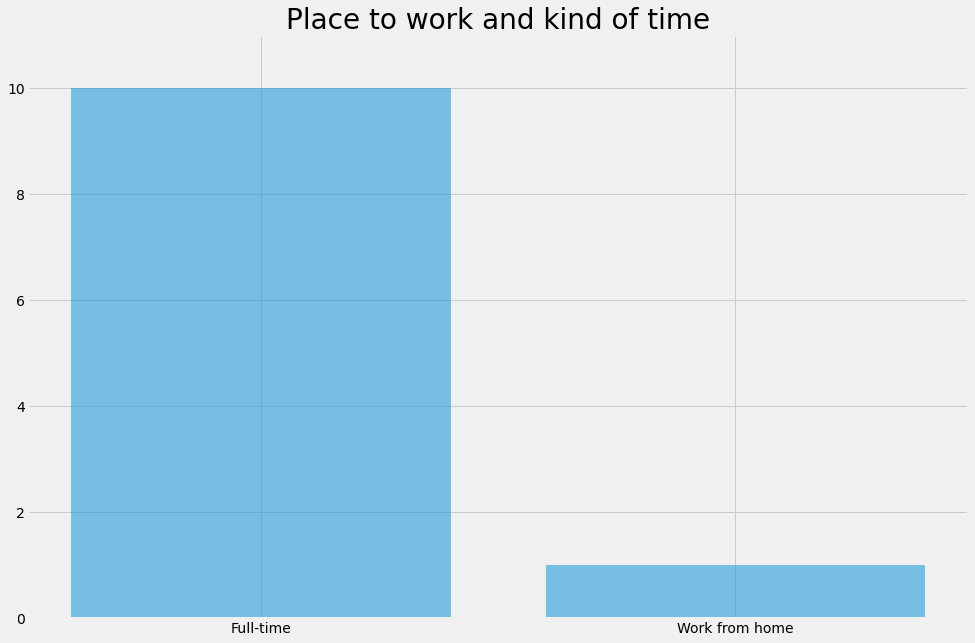

In [ ]:
#Bar chart of the places and time to do the job

ti = pd.DataFrame(time)
tim =ti.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=tim.index, height= tim.values, alpha=0.5)
plt.title("Place to work and kind of time", fontsize=28)
plt.ylim(0,11)


Text(0.5, 0, 'Posted at')

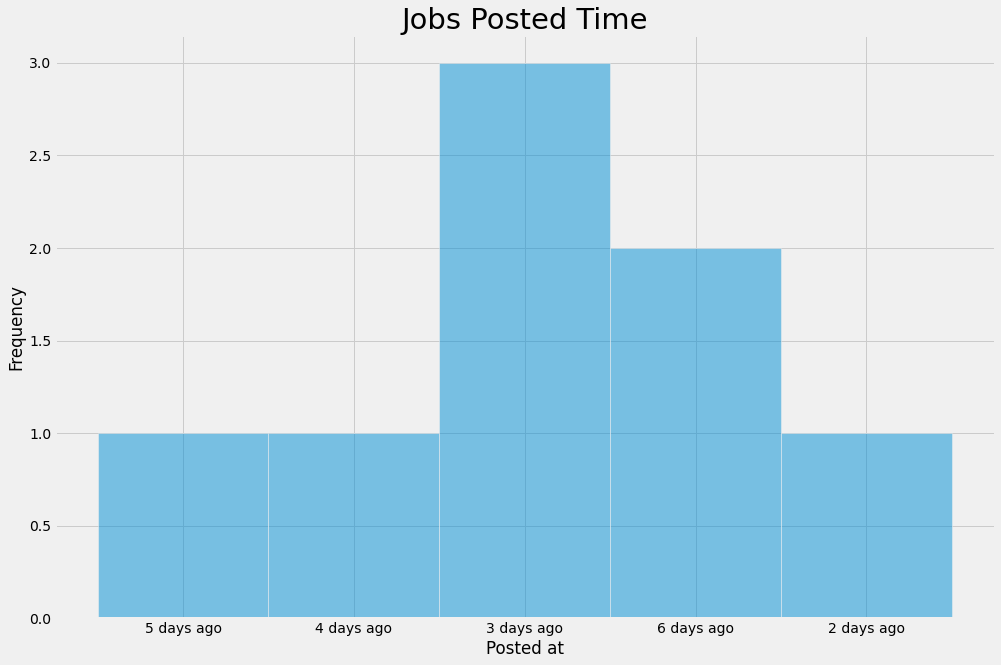

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(jobs_df['posted_at'], bins=15, alpha=0.5)
plt.title("Jobs Posted Time", fontsize=29)
plt.ylabel("Frequency")
plt.xlabel("Posted at")

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

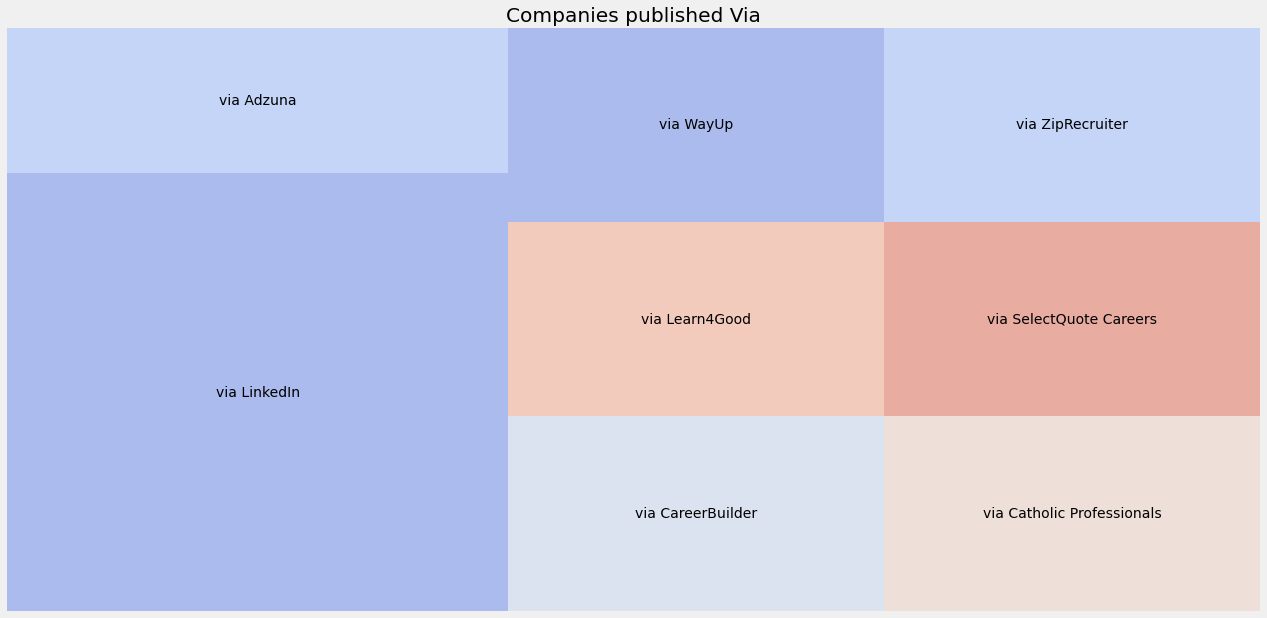

In [ ]:
#Tree-map chart than where the companies published the vacancies

via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(20,10))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("coolwarm"), alpha=0.5)
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)